# CS 663 - Machine Learning Spring, 2024
## Assignment 02 - KMeans

### Goals:
1. Develop your version of K-Means.
2. Compare performance of different implementations.
3. Demonstrate understanding of clustering algorithms like K-Means, DBSCAN, and Hierarchical.
4. Extend functionality of K-Means implementation through additional parameters.



## Problem 3 : Choose and run clustering algorithms

#### Problem:
Clustering analysis on  Mopsi data subsets.

#### Datasets:
1. Mopsi data subset (routes around Finland).

#### Algorithms:
- Hierarchical

## Evaluation:
- Output showcasing clusters.
- Evaluation metrics: Silhouette score for Mopsi data.


## Approach

1. We first import the dataset and perform EDA
2. Based on EDA we draw conclusions on nature of the dataset and the expected clustering algorithm that can be used.
3. Clean the data and do hyperparameter tuning on them.
4. Disply the cluster
5. Get metrics on the model output and draw necessary conslusions

## References

- [Scikit-Learn Documentation: KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)  
  Official documentation for the KMeans clustering algorithm in Scikit-Learn.

- [IEEE Xplore Article: SKLearn reference values](https://ieeexplore.ieee.org/document/9260048)  


# Problem 3B:

**Dataset:** Mopsi data subset - taken from people tracking their routes around Finland. Routes consist of activities such as walking, cycling, skiing, or vehicle transport, sometimes while conducting daily activities.

**Problem Statement:**  
We aim to analyze the Mopsi dataset to identify patterns and behaviors of individuals during their routes. Utilizing clustering methods, we intend to group routes based on features. Since not much is provided we assume the data represent the lat long identifiers. The number of clusters will be determined based on the coherence and distinctiveness of the resulting groups.


In [1]:
import sys
sys.path.append("./modules")
from blob_data._blob_data import generate_blob_data
from eda.eda import EDAAnalyzer
from kmeans._kmeans import KMeans as myKMeans
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from cluster_algo.kmeans.kmeans_clustering import KMeansClustering
from cluster_algo.hierarchical.HierarchicalClustering import HierarchicalClustering

#### EDA

In [2]:
df = pd.read_csv(r"./input/MopsiLocationsUntil2012-Finland.txt", delimiter="\s+", header=None, names=["x", "y"])

In [3]:
# List of columns the clustering could be build upon
features = ['x', 'y']

In [4]:
data = df[features]
eda_analyzer = EDAAnalyzer(data)
eda_analyzer.display_head(5)

,x,y
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437


In [5]:
eda_analyzer.display_shape()

'Shape of data: rows: 13467 cols: 2'

In [6]:
eda_analyzer.display_column_info()

,Column Name,Non-null Count,Percent Non-null,Data Type
0,x,13467,100.0,int64
1,y,13467,100.0,int64


In [7]:
eda_analyzer.describe()

,count,mean,std,min,25%,50%,75%,max
x,13467.0,625094.775897,7844.331518,599247.0,625930.0,626018.0,626192.0,697835.0
y,13467.0,289004.669043,20399.428325,212016.0,296164.0,297448.0,297796.5,314328.0


### Univariate Analysis

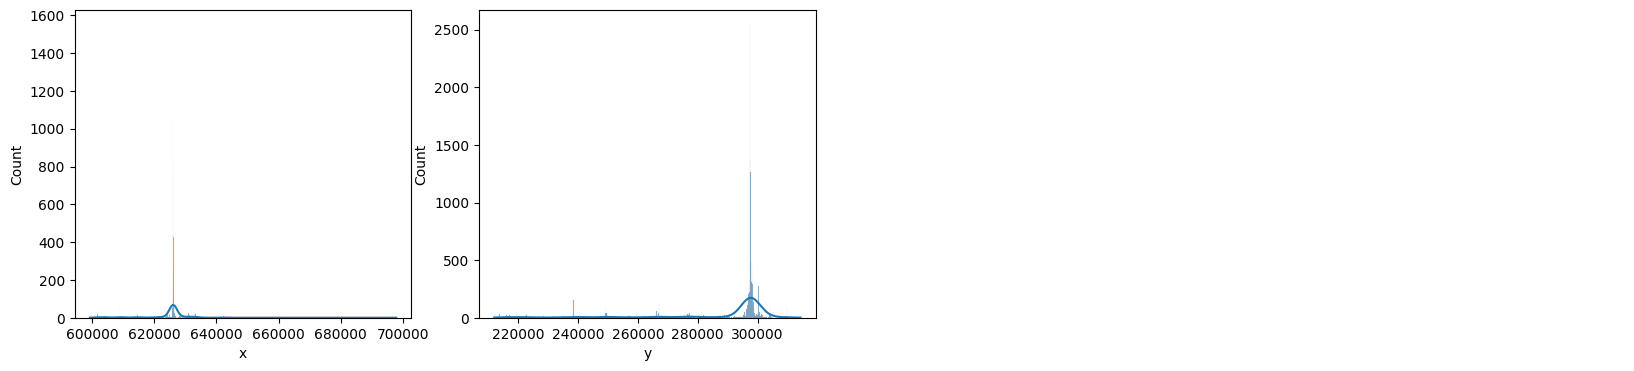

In [8]:
eda_analyzer.plot_histograms()

#### Bivariate Analysis

<Axes: xlabel='x', ylabel='y'>

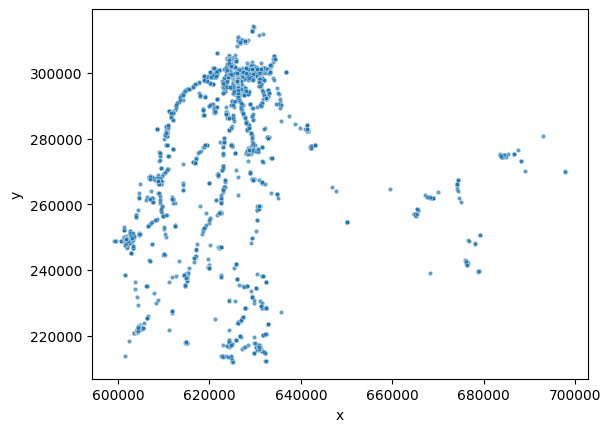

In [9]:
sns.scatterplot(data=df, x=df.x, y=df.y,s=10,alpha=0.7)

In [10]:
# eda_analyzer.get_pair_plot()

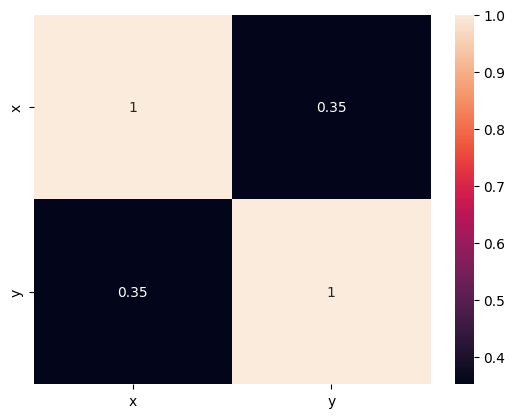

In [11]:
eda_analyzer.get_heat_map()

In [12]:
eda_analyzer.get_top_correlated_pairs()

,Column 1,Column 2,Correlation Coefficient,Correlation Category
0,x,y,0.351543,Moderate


### Data quality evaluvation : 
 * The data resembles the map of Finland with some points seeming to be international points.
 * Lets not remove these points as clustering could segregate them out.
 * The data follows a right-skewed data

# Clustering Algorithm Recommendation:

Given the nature of the dataset and problem statement, hierarchical clustering is recommended for the following reasons:

- **Hierarchical Nature:** Hierarchical clustering is well-suited for analyzing patterns and behaviours in spatial data, making it a good fit for tracking routes around Finland.
- **No Need for Prespecified Number of Clusters:** Unlike K-means, hierarchical clustering does not require specifying the number of clusters in advance. This is advantageous when the optimal number of clusters is unknown.
- **Interpretability:** The dendrogram produced by hierarchical clustering provides a visual representation of cluster relationships, aiding in the interpretation of results and identification of meaningful groupings.

With these considerations in mind, hierarchical clustering is well-suited to uncovering meaningful patterns and behaviours within the Mopsi dataset, facilitating comprehensive analysis and insights into individual routes and travel behaviours.


### Model Cleaning

 * The model data requires no need to fill na but normalization is required.
 * It would be done as a part of hyperparameter tuning and fit

In [13]:
features = ['x', 'y']

In [14]:
model_data = df[features]

### Model Training

In [15]:
hierarchical_clustering = HierarchicalClustering()

 #### Hyperparameter tuning 

In [16]:
for num_clusters in range(2, 9):
    hierarchical_clustering = HierarchicalClustering(num_clusters=num_clusters)
    cluster_labels = hierarchical_clustering.fit(model_data)
    score = hierarchical_clustering.get_clustering_metrics(model_data)
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.7964565959351486
Number of clusters: 3, Silhouette Score: 0.814136225090953
Number of clusters: 4, Silhouette Score: 0.8211413825043337
Number of clusters: 5, Silhouette Score: 0.7246225090900265
Number of clusters: 6, Silhouette Score: 0.7305645662725619
Number of clusters: 7, Silhouette Score: 0.7401739146805243
Number of clusters: 8, Silhouette Score: 0.7734753754686676


 * We go head with selecting the number of clusters as 4 

In [17]:
hierarchical_clustering = HierarchicalClustering(num_clusters=4)

In [18]:
cluster_labels = hierarchical_clustering.fit(model_data)
df["Cluster_Labels"] = cluster_labels

#### Model Evaluvation

 * Model Output - Clusters
   

<Axes: xlabel='x', ylabel='y'>

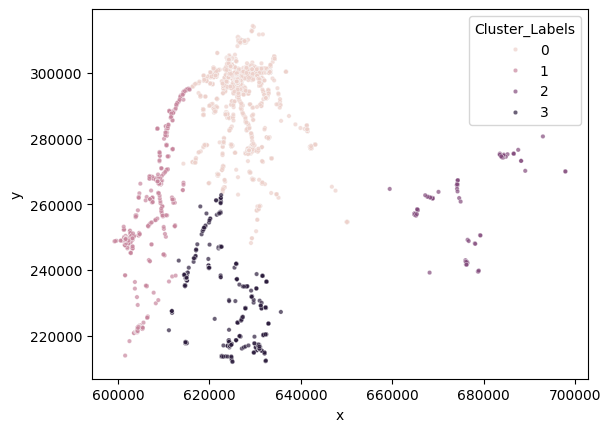

In [19]:
sns.scatterplot(data=df, x=df.x, y=df.y,s=10,hue=df.Cluster_Labels,alpha=0.7)

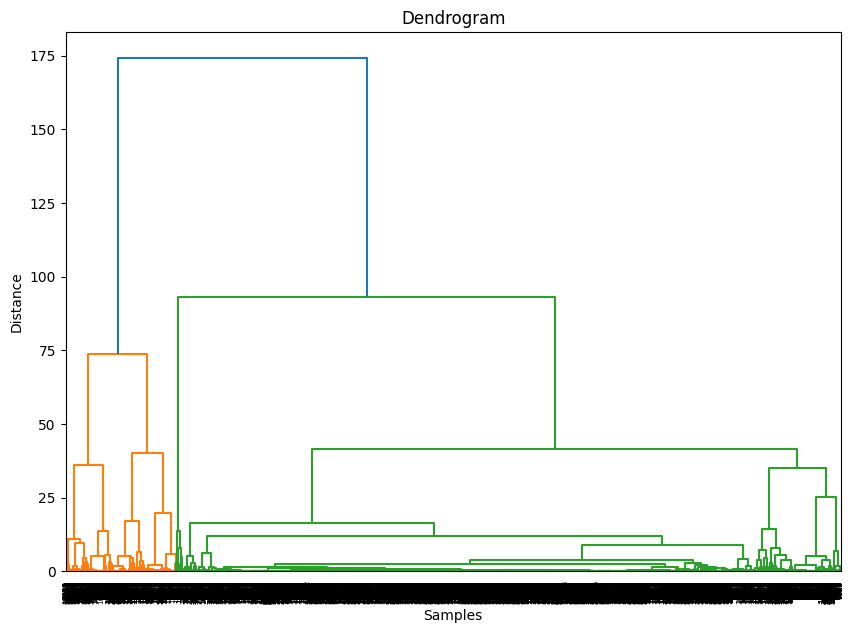

In [20]:
hierarchical_clustering.show_dendrogram(model_data)

### Model and output evaluvation : 
    * The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

## Conclusions:

### Evaluation Metrics:
- Both numerical and visual metrics are used for evaluation.
  - For numerical evaluation, we consider the Silhouette Score.
  - For visual evaluation, scatter plots of different location markers with labels are utilized.

### Silhouette Score:
- The Silhouette Score of 0.82 is moderate than expected but represents borderline cases that require careful consideration.

### Insights from Visual Analysis:
- The scatter plots illustrate distinct clustering patterns
- The clusters very much mimic the topography of Finland where it's segregated into plains, basins, mountains and others.

### Further Considerations:
- Future strategies could focus on type of activity, report date, motional values